In [3]:
import pandas as pd

# Load the dataset
data = pd.read_csv('./Uncleaned_DS_jobs/Uncleaned_DS_jobs.csv')

# Explore the data
print(data.head())
print(data.info())
print(data.describe())
print(data.isnull().sum())


   index          Job Title               Salary Estimate  \
0      0  Sr Data Scientist  $137K-$171K (Glassdoor est.)   
1      1     Data Scientist  $137K-$171K (Glassdoor est.)   
2      2     Data Scientist  $137K-$171K (Glassdoor est.)   
3      3     Data Scientist  $137K-$171K (Glassdoor est.)   
4      4     Data Scientist  $137K-$171K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Description\n\nThe Senior Data Scientist is re...     3.1   
1  Secure our Nation, Ignite your Future\n\nJoin ...     4.2   
2  Overview\n\n\nAnalysis Group is one of the lar...     3.8   
3  JOB DESCRIPTION:\n\nDo you have a passion for ...     3.5   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

              Company Name       Location            Headquarters  \
0         Healthfirst\n3.1   New York, NY            New York, NY   
1             ManTech\n4.2  Chantilly, VA             Herndon, VA   
2      Analysis Group\n3.8     Boston, MA

In [4]:
#Extract Salary Information

In [5]:
# Check the unique values in 'Salary Estimate'
print(data['Salary Estimate'].unique())

# Extracting numerical salary from 'Salary Estimate'
data = data[data['Salary Estimate'] != '-1']  # Remove rows with '-1' as salary estimate
data['Min Salary'] = data['Salary Estimate'].apply(lambda x: int(x.split('-')[0].replace('K','').replace('$','').replace(' ','')))
data['Max Salary'] = data['Salary Estimate'].apply(lambda x: int(x.split('-')[1].split('(')[0].replace('K','').replace('$','').replace(' ','')))
data['Avg Salary'] = (data['Min Salary'] + data['Max Salary']) / 2

# Drop the original 'Salary Estimate' column
data = data.drop(['Salary Estimate'], axis=1)



['$137K-$171K (Glassdoor est.)' '$75K-$131K (Glassdoor est.)'
 '$79K-$131K (Glassdoor est.)' '$99K-$132K (Glassdoor est.)'
 '$90K-$109K (Glassdoor est.)' '$101K-$165K (Glassdoor est.)'
 '$56K-$97K (Glassdoor est.)' '$79K-$106K (Glassdoor est.)'
 '$71K-$123K (Glassdoor est.)' '$90K-$124K (Glassdoor est.)'
 '$91K-$150K (Glassdoor est.)' '$141K-$225K (Glassdoor est.)'
 '$145K-$225K(Employer est.)' '$79K-$147K (Glassdoor est.)'
 '$122K-$146K (Glassdoor est.)' '$112K-$116K (Glassdoor est.)'
 '$110K-$163K (Glassdoor est.)' '$124K-$198K (Glassdoor est.)'
 '$79K-$133K (Glassdoor est.)' '$69K-$116K (Glassdoor est.)'
 '$31K-$56K (Glassdoor est.)' '$95K-$119K (Glassdoor est.)'
 '$212K-$331K (Glassdoor est.)' '$66K-$112K (Glassdoor est.)'
 '$128K-$201K (Glassdoor est.)' '$138K-$158K (Glassdoor est.)'
 '$80K-$132K (Glassdoor est.)' '$87K-$141K (Glassdoor est.)'
 '$92K-$155K (Glassdoor est.)' '$105K-$167K (Glassdoor est.)']


In [6]:
# Encode Categorical Variables

In [7]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
le = LabelEncoder()
categorical_cols = ['Job Title', 'Job Description', 'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 
                    'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors']

for col in categorical_cols:
    data[col] = le.fit_transform(data[col].astype(str))

# Check the resulting data
print(data.head())


   index  Job Title  Job Description  Rating  Company Name  Location  \
0      0        155              142      12           175       119   
1      1         49              392      23           236        35   
2      2         49              319      19            31        19   
3      3         49              193      16           186       120   
4      4         49              125      10            18       119   

   Headquarters  Size  Founded  Type of ownership  Industry  Sector  Revenue  \
0           142     3       76                  7        31      13       13   
1            89     5       54                  3        43       5        0   
2            28     3       65                  9        12       5        4   
3            15     6       83                  3        16      14        4   
4           142     7       81                  2         2       5       13   

   Competitors  Min Salary  Max Salary  Avg Salary  
0           41         137       

In [8]:
#Proceed with Feature Engineering, Modeling, and Evaluation

Mean Squared Error: 8.047943334056738e-28
R^2 Score: 1.0


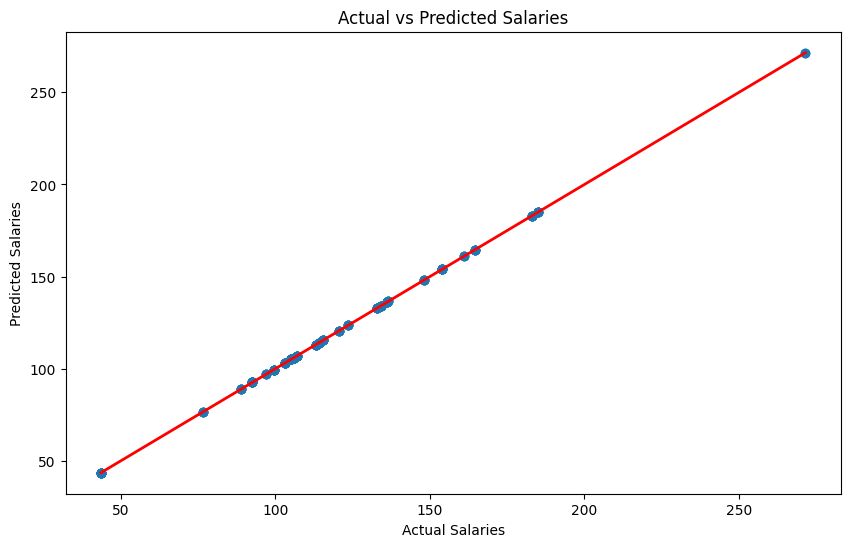

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define features and target variable
X = data.drop(['Avg Salary'], axis=1)
y = data['Avg Salary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Plotting actual vs predicted salaries
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Salaries')
plt.ylabel('Predicted Salaries')
plt.title('Actual vs Predicted Salaries')
plt.show()
